In [1]:
# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

In [5]:
df = pd.read_csv("UrbanSound/UrbanSound8K.csv")
df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [10]:
dat1, sampling_rate1 = librosa.load('UrbanSound/fold5/100032-3-0-0.wav')
dat2, sampling_rate2 = librosa.load('UrbanSound/fold5/100263-2-0-117.wav')


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

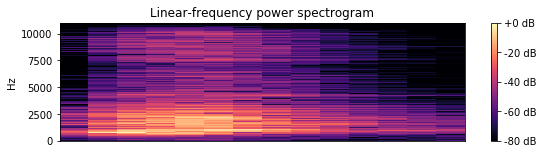

In [11]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

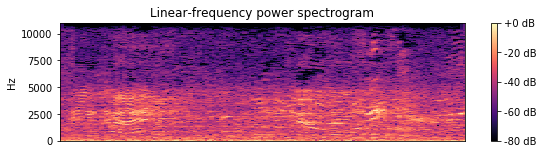

In [12]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

/Users/yash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


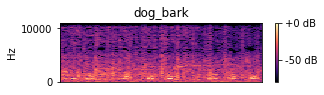

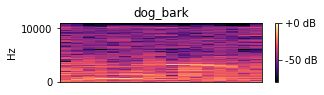

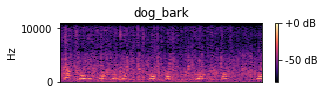

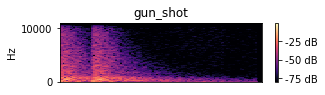

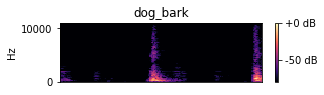

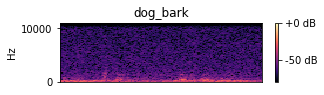

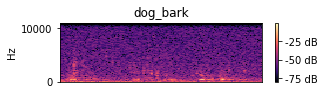

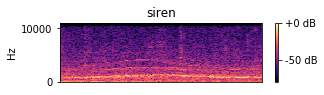

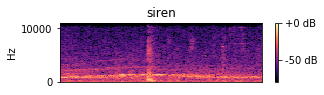

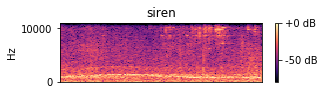

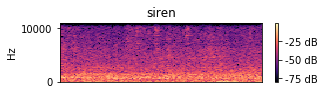

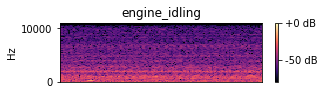

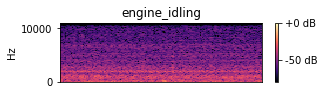

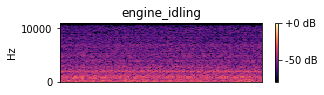

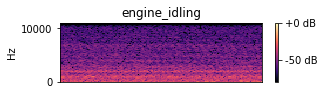

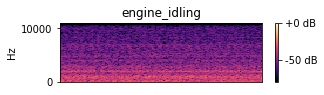

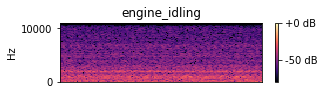

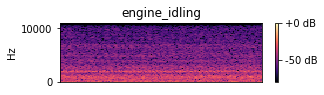

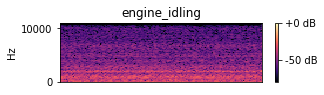

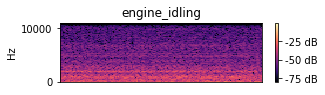

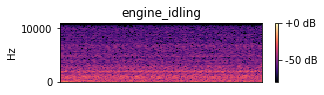

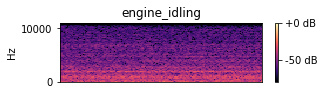

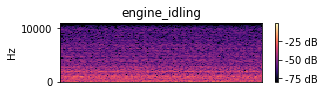

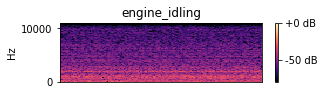

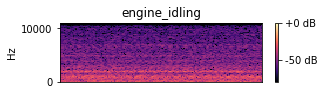

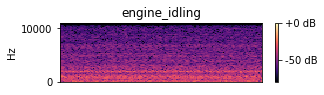

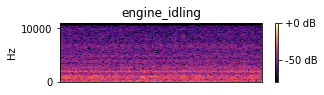

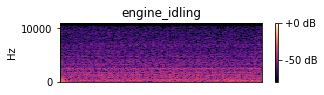

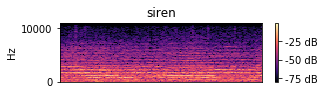

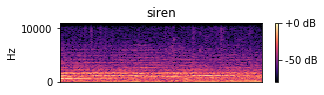

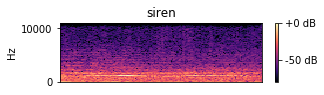

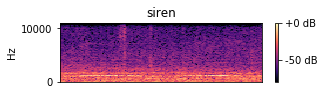

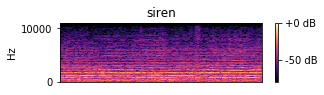

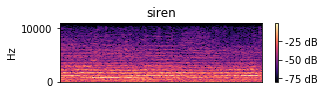

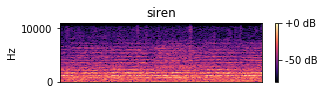

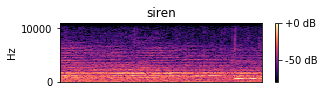

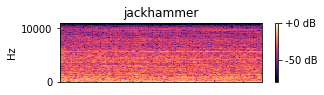

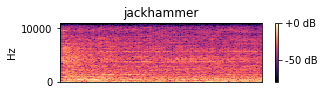

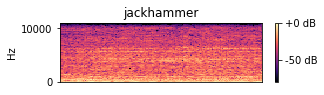

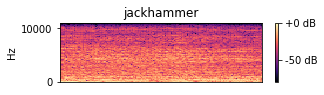

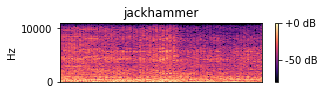

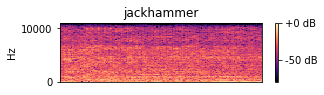

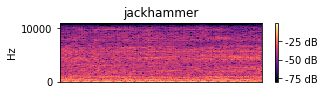

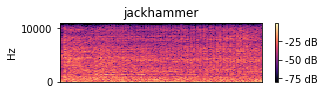

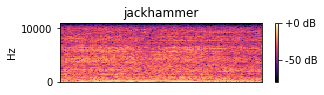

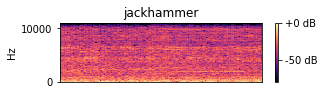

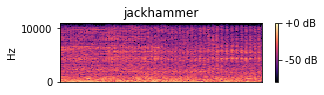

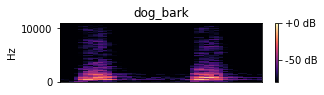

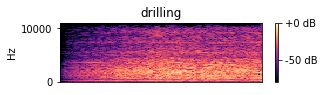

In [14]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(100, 197, 2):
    path = 'UrbanSound/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [15]:
dat1, sampling_rate1 = librosa.load('UrbanSound/fold5/100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 14)

In [16]:
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = 'UrbanSound/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [17]:
temp = parser(df)

In [18]:
temp = np.array(temp)
data = temp.transpose()

In [19]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [20]:
for i in range(8732):
    X[i] = (X_[i])

In [21]:
Y = to_categorical(Y)

In [22]:
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [24]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [25]:
input_dim = (16, 8, 1)

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [28]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
model.fit(X_train, Y_train, epochs = 90, batch_size = 50, validation_data = (X_test, Y_test))


Epoch 1/90
131/131 [==============================] - 4s 34ms/step - loss: 1.5395 - accuracy: 0.4828 - val_loss: 1.2596 - val_accuracy: 0.5767
Epoch 2/90
131/131 [==============================] - 4s 34ms/step - loss: 1.1259 - accuracy: 0.6206 - val_loss: 1.2002 - val_accuracy: 0.6097
Epoch 3/90
131/131 [==============================] - 4s 33ms/step - loss: 0.9835 - accuracy: 0.6694 - val_loss: 1.0121 - val_accuracy: 0.6606
Epoch 4/90
131/131 [==============================] - 4s 32ms/step - loss: 0.8706 - accuracy: 0.7099 - val_loss: 1.0417 - val_accuracy: 0.6816
Epoch 5/90
131/131 [==============================] - 4s 33ms/step - loss: 0.7567 - accuracy: 0.7438 - val_loss: 0.9438 - val_accuracy: 0.7096
Epoch 6/90
131/131 [==============================] - 4s 31ms/step - loss: 0.6995 - accuracy: 0.7710 - val_loss: 0.8640 - val_accuracy: 0.7306
Epoch 7/90
131/131 [==============================] - 4s 31ms/step - loss: 0.6411 - accuracy: 0.7876 - val_loss: 0.9546 - val_accuracy: 0.7109

Epoch 58/90
131/131 [==============================] - 4s 33ms/step - loss: 0.0896 - accuracy: 0.9708 - val_loss: 0.8150 - val_accuracy: 0.8539
Epoch 59/90
131/131 [==============================] - 4s 33ms/step - loss: 0.0751 - accuracy: 0.9753 - val_loss: 0.8098 - val_accuracy: 0.8456
Epoch 60/90
131/131 [==============================] - 5s 37ms/step - loss: 0.0973 - accuracy: 0.9681 - val_loss: 0.8597 - val_accuracy: 0.8397
Epoch 61/90
131/131 [==============================] - 7s 53ms/step - loss: 0.1052 - accuracy: 0.9661 - val_loss: 0.8818 - val_accuracy: 0.8461
Epoch 62/90
131/131 [==============================] - 5s 39ms/step - loss: 0.0996 - accuracy: 0.9667 - val_loss: 0.8633 - val_accuracy: 0.8539
Epoch 63/90
131/131 [==============================] - 4s 32ms/step - loss: 0.0882 - accuracy: 0.9705 - val_loss: 0.7691 - val_accuracy: 0.8598
Epoch 64/90
131/131 [==============================] - 5s 39ms/step - loss: 0.0824 - accuracy: 0.9707 - val_loss: 0.8851 - val_accuracy:

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

In [31]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print("score is:",score)

69/69 [==============================] - 1s 8ms/step - loss: 0.8572 - accuracy: 0.8644
score is: [0.8571831583976746, 0.8644067645072937]


In [32]:
preds = np.argmax(predictions, axis = 1)

In [33]:
result = pd.DataFrame(preds)
result.to_csv("UrbanSound8kResults.csv")

In [56]:
import pandas as pd
import numpy as np
data = pd.read_csv("UrbanSound/UrbanSound8K.csv")
data.shape

(8732, 8)

In [57]:
data.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [58]:
appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

index  jackhammer  children_playing  street_music  drilling  dog_bark  \
0   fold1         120               100           100       100       100   
1   fold2         120               100           100       100       100   
2   fold3         120               100           100       100       100   
3   fold4         120               100           100       100       100   
4   fold5         120               100           100       100       100   
5   fold6          68               100           100       100       100   
6   fold7          76               100           100       100       100   
7   fold8          78               100           100       100       100   
8   fold9          82               100           100       100       100   
9  fold10          96               100           100       100       100   

   air_conditioner  engine_idling  siren  car_horn  gun_shot  
0              100             96     86        36        35  
1              100            100     91        42        35  
2              100            107    119        43        36  
3              100            107    166        59        38  
4              100            107     71        98        40  
5              100            107     74        28        46  
6              100            106     77        28        51  
7              100             88     80        30        30  
8              100             89     82        32        31  
9              100             93     83        33        32

In [59]:
data['class'].value_counts(normalize=True)

street_music        0.114521
drilling            0.114521
engine_idling       0.114521
dog_bark            0.114521
air_conditioner     0.114521
children_playing    0.114521
jackhammer          0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

In [96]:
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('UrbanSound', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  children_playing


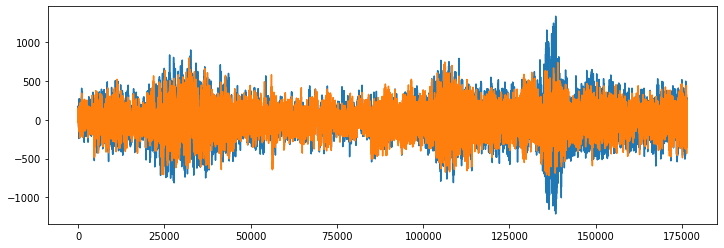

In [97]:
fullpath, label = path_class('100263-2-0-117.wav')
wav_plotter(fullpath,label)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  0.31755102040816324  second
number of samples:  14004
class:  dog_bark


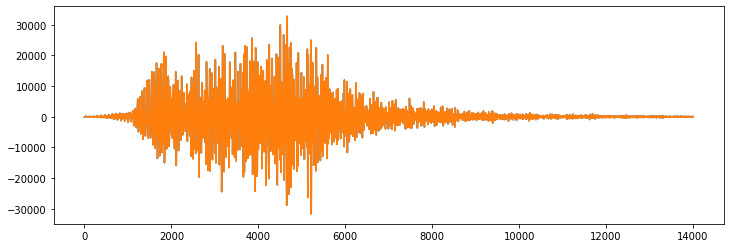

In [98]:
fullpath, label = path_class('100032-3-0-0.wav')
wav_plotter(fullpath,label)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  2.25  second
number of samples:  99225
class:  gun_shot


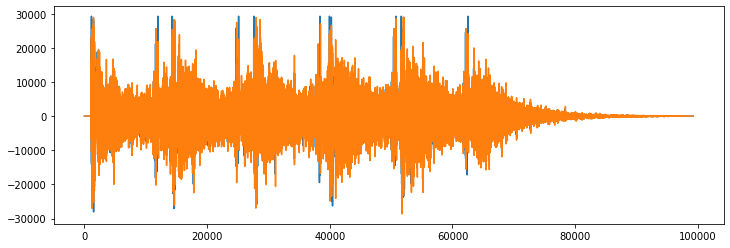

In [99]:
fullpath, label = path_class('7061-6-0-0.wav')
wav_plotter(fullpath,label)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  drilling


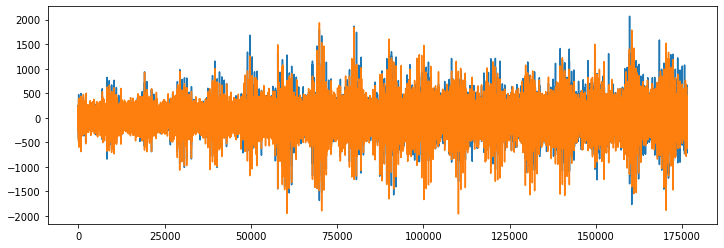

In [100]:
fullpath, label = path_class('14113-4-0-1.wav')
wav_plotter(fullpath,label)